# Getting golestan captcha

In [1]:
import requests
import base64
import numpy as np
import time

url = 'https://edu.znu.ac.ir/Forms/AuthenticateUser/captcha.aspx?0.40381493127445034&x859=386&x763=844'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36"}


for i in range(944,1000):
    x = requests.get(url, headers=headers, stream=True)

    a = x.content

    with open(f'./dataset-golestan/captcha{i}.jpg','wb') as f:
        f.write(a)
    delay = np.random.randint(2)
    time.sleep(10)

# Getting captcha from sheypoor website

In [11]:
import requests
import base64
import numpy as np
import time

url = 'https://www.sheypoor.com/api/web/captcha/refresh'
headers = {
    "authority": "www.sheypoor.com",
    "method": "POST",
    "path": "/api/web/captcha/refresh",
    "scheme": "https",
    "accept": "*/*",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "en-US,en;q=0.9",
    "content-length": "38",
    "content-type": "application/x-www-form-urlencoded; charset=UTF-8",
    "cookie": "plog=False; ts=b536dc923761e246fa3d552db50df071; track_id=e2e687919ce5e3f3a9a85f682145651c; AMP_TOKEN=%24NOT_FOUND; _ga=GA1.2.527994953.1644523644; _gid=GA1.2.672309292.1644523644; _gat=1",
    "origin": "https://www.sheypoor.com",
    # "referer": "https://www.sheypoor.com/%D9%81%D8%B1%D8%B2-%D8%A8%D8%B2%D8%B1%DA%AF-%D8%A7%D9%87%D9%86%DA%AF%D8%B1%DB%8C-%D8%B3%D9%86%DA%AF%D8%A8%D8%B1%DB%8C-%D8%AF%DB%8C%D9%85%D8%B1-%D8%AF%D8%A7%D8%B1-%D8%A8%D8%A7%D8%B3-402738844.html",
    "sec-ch-ua": '"Not A;Brand";v="99", "Chromium";v="98", "Google Chrome";v="98"',
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": "Windows",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "user-agent": "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36",
    "x-requested-with": "XMLHttpRequest"
}
data = {"token": "103159f5a73c63cacc4c9d8680d45325"}

for i in range(500,1000):
    x = requests.post(url, headers=headers, data=data, stream=True)

    a = x.json()['data']['image']
    a = a.encode('utf-8')

    with open(f'./dataset/captcha{i}.jpg','wb') as f:
        f.write(base64.decodebytes(a))
    delay = np.random.randint(5)
    # time.sleep(delay)

# preprocessing images

In [2]:
import cv2
import os
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


root_path = os.getcwd()
dataset_path = os.path.join(root_path, 'dataset')
# dataset_path = os.path.join(root_path, 'dataset-golestan')
images = [img for img in os.listdir(dataset_path)]


# cv2.imshow('name',image)
# cv2.waitKey(0) 
# #closing all open windows 
# cv2.destroyAllWindows() 

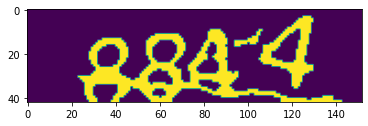

In [3]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

# 501

org_image = cv2.imread(os.path.join(dataset_path, images[2]))
image_gray = cv2.cvtColor(org_image, cv2.COLOR_RGB2GRAY)
# crop_image = image_gray[:int(image_gray.shape[0]*0.9), :]
crop_image = image_gray
image_gray2 = cv2.blur(crop_image, (4,4))
image_sharp = cv2.GaussianBlur(image_gray2, (0,0), sigmaX=1, sigmaY=20, borderType=cv2.BORDER_DEFAULT)
image_sharp = cv2.addWeighted(image_gray2, 2, image_sharp, -0.15, 0)
# image_sharp = cv2.addWeighted(image_gray2, 1.8, image_sharp, -0.55, 0)
image_sharp_not = cv2.bitwise_not(image_sharp)
ret, image_zeroone = cv2.threshold(image_sharp_not, 30, 255, cv2.THRESH_BINARY)


plt.imshow(image_zeroone)
# # plt.axvline(50, color='y', )
# # plt.axvline(90, color='y', )
# # plt.axvline(110, color='y', )
# # plt.axvline(68, color='y', )
plt.show()

In [373]:
cv2.imshow('name', image_zeroone)
# cv2.imshow('name', org_image)
cv2.waitKey(0)
# #closing all open windows 
cv2.destroyAllWindows()

# Detection

In [4]:
from sklearn.cluster import KMeans
import numpy as np

In [19]:
# points = np.zeros(shape=(sum(sum(image_zeroone)),2), dtype='int32')

num_pixels = image_zeroone.shape[0]*image_zeroone.shape[1]
points = np.zeros(shape=(num_pixels,2), dtype='int32')
tmp = []
k=0
for i in range(image_zeroone.shape[0]):
    for j in range(image_zeroone.shape[1]):
        if int(image_zeroone[i,j]) == 255:
            tmp.append([i,j])
            points[k,0]=i
            points[k,1]=j
            k = k+1

In [11]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=20, init='k-means++', max_iter=int(1e40)).fit(tmp)
# kmeans.inertia_
cluster_centers = kmeans.cluster_centers_
cluster_centers

278526.53999336064

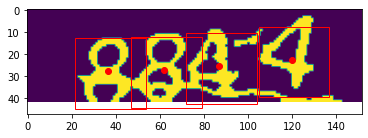

In [24]:
x = cluster_centers[:,0]
y = cluster_centers[:,1]
plt.imshow(image_zeroone)
plt.scatter(y,x, color='red')

for center in cluster_centers:
    plt.gca().add_patch(Rectangle((center[1]-15,center[0]-15),32,32,linewidth=1,edgecolor='r',facecolor='none'))

In [422]:
import numpy as np

histSize = 140
txtMargin = 20

image_sharp_not = cv2.bitwise_not(image_zeroone)
histdata = cv2.reduce(image_zeroone, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32S)
histdata = cv2.normalize(histdata, histdata, 0, 255, cv2.NORM_MINMAX)

a = list(np.reshape(histdata, (-1,1)))
plt.plot(a)
plt.axvline(50, color='y', )
plt.axvline(90, color='y', )
plt.axvline(68, color='y', )
plt.axvline(110, color='y', )
# plt.axvline(130, color='y', )
plt.show()


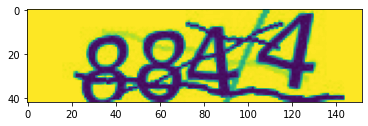

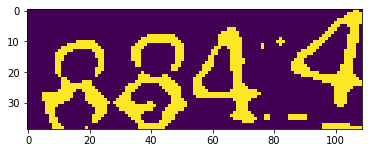

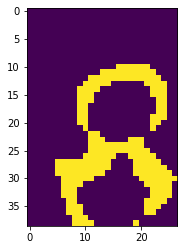

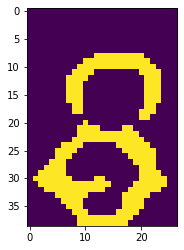

<ipython-input-452-76ed0d60d15c>:60: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(x)


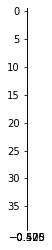

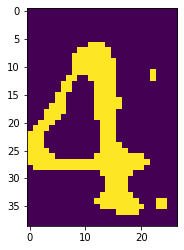

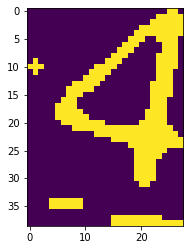

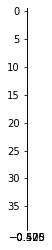

In [452]:
## https://cagriuysal.github.io/Simple-Captcha-Breaker/

pattern = 1
# use median blur for pattern1 and gaussian blur for patter2 images as pre-processing

srcImage = cv2.medianBlur(image_sharp, 3) if pattern == 1 else cv2.GaussianBlur(image_sharp, (3,3), 0)


#obtained through experiment 
pattern1_thresh = 250
pattern2_thresh = 155
thresh = pattern1_thresh if pattern == 1 else pattern2_thresh
ret, threshImage = cv2.threshold(srcImage, thresh, 255, cv2.THRESH_BINARY_INV)

min_connected_len = 15
# get connected components
numLabel, labelImage, stats, centroids = cv2.connectedComponentsWithStats(threshImage, 8, cv2.CV_32S)
# holds if component will be included to foreground
foreComps = [i for i in range(1, numLabel) if stats[i, cv2.CC_STAT_AREA] >= min_connected_len]
# Get binary image after erasing some connected components those areas under the threshold
binaryImage = np.zeros_like(srcImage)
labelImage = np.array(labelImage)
for k in [np.where(labelImage == i) for i in foreComps]:
	binaryImage[k] = 255

minCol = 20; # seen that all digits start at 30th column 
			# no need for additional computation
# find the boundaries where digits present in the image 
array = np.array([stats[i, cv2.CC_STAT_LEFT] + stats[i, cv2.CC_STAT_WIDTH]  for i in foreComps])
maxCol = max(array[np.where(array < 130)]) # observed that digits right boundary never exceeds 125th pixel 
									# thus this one prevents false boundaries
# find boundaries in y axis
minRow = min([stats[i, cv2.CC_STAT_TOP] for i in foreComps])
maxRow = max([stats[i, cv2.CC_STAT_TOP] + stats[i, cv2.CC_STAT_HEIGHT] for i in foreComps])
subImage = threshImage[minRow:maxRow, minCol:maxCol]


# Sub image divided to half in order to segment digit's more precisely
subImage1 = subImage[:, :int(subImage.shape[1]/2)]
subImage2 = subImage[:, int(subImage.shape[1]/2):]
colIncrement1 = subImage1.shape[1] / 2
colIncrement2 = subImage2.shape[1] / 2
# get segmented digits as list
digitList1 = []
digitList2 = []
col1 = 0
col2 = 0
for i in range(2):
	digitList1.append(subImage1[:, int(col1):int(col1+colIncrement1)])
	digitList2.append(subImage2[:, int(col2):int(col2+colIncrement2)])
	col1 += colIncrement1
	col2 += colIncrement2
digitList1.append(subImage1[:, int(col1):])
digitList2.append(subImage2[:, int(col2):])
digitList = digitList1 + digitList2

plt.imshow(image_gray); plt.show()
plt.imshow(subImage); plt.show()
for x in digitList:
	plt.imshow(x)
	plt.show()

In [ ]:
## Review this soloution for more noise cancelling process

image = cv2.imread('./test_img/1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
hist = cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)
hist = cv2.calcBackProject([image_gray], [0], hist, [0, 100], 100)
# hist /= hist.sum()

plt.imshow(hist)
plt.show()

# Convoloutional model

In [ ]:
import tensorflow as tf

#conv1
with tf.variable_scope('conv1') as scope:
    kernel = _variable_with_weight_decay('weights', shape=[5, 5, 3, 64], stddev=5e-2, wd=None)
    conv = tf.nn.conv2d(images, kernel, [1, 1, 1, 1], padding='SAME')
    biases = _variable_on_cpu('biases', [64], tf.constant_initializer(0.0))
    pre_activation = tf.nn.bias_add(conv, biases)
    conv1 = tf.nn.relu(pre_activation, name=scope.name)
    _activation_summary(conv1)
#pool1
pool1 = tf.nn.max_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool1')
#norm1
norm1 = tf.nn.lrn(pool1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm1')
#conv2
with tf.variable_scope('conv2') as scope:
    kernel = _variable_with_weight_decay('weights', shape=[5, 5, 64, 64], stddev=5e-2, wd=None)
    conv = tf.nn.conv2d(norm1, kernel, [1, 1, 1, 1], padding='SAME')
    biases = _variable_on_cpu('biases', [64], tf.constant_initializer(0.1))
    pre_activation = tf.nn.bias_add(conv, biases)
    conv2 = tf.nn.relu(pre_activation, name=scope.name)
    _activation_summary(conv2)
#norm2
norm2 = tf.nn.lrn(conv2, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm2')
#pool2
pool2 = tf.nn.max_pool(norm2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool2')
#FC3
with tf.variable_scope('fc3') as scope:
    reshape = tf.reshape(pool2, [images.get_shape().as_list()[0], -1])
    dim = reshape.get_shape()[1].value
    weights = _variable_with_weight_decay('weights', shape=[dim, 384], stddev=0.04, wd=0.004)
    biases = _variable_on_cpu('biases', [384], tf.constant_initializer(0.1))
    fc3 = tf.nn.relu(tf.matmul(reshape, weights) + biases, name=scope.name)
     _activation_summary(fc3)
#FC4
with tf.variable_scope(fc4') as scope:
    weights = _variable_with_weight_decay('weights', shape=[384,192], stddev=0.04, wd=0.004)
    biases = _variable_on_cpu('biases', [192], tf.constant_initializer(0.1))
    fc4 = tf.nn.relu(tf.matmul(local3, weights) + biases, name=scope.name)
    _activation_summary(fc4)